#How detect the credit card fraud 


## Samplings types
Resampling --> Para casos en los que el sistema está desbalanceado como éste

Undersampling --> Eliminar casos del tipo mayoritario

Oversampling -->  Replicar de forma sintética los casos minoritarios

SMOTE --> Una técnica combinación de las dos anteriores 

In [36]:
#We import our libreries and load the CSV document
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import io
from google.colab import files

In [9]:
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [11]:
df = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')))

##EDA

In [12]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [13]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [21]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V22       V23  \
0       0.462388  0.239599

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


In [24]:
print(df.groupby('Amount').size())

Amount
0.00        1825
0.01         718
0.02          85
0.03           3
0.04          11
            ... 
11898.09       1
12910.93       1
18910.00       1
19656.53       1
25691.16       1
Length: 32767, dtype: int64


##Falses and true operations 

Text(0, 0.5, 'Frecuencia')

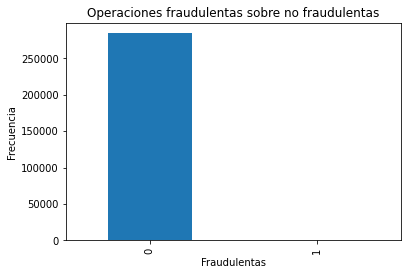

In [17]:
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')
plt.title ("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Frecuencia")

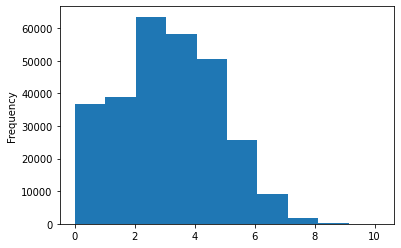

In [20]:
df['logAmount'] = np.log(df['Amount']+1)
df['logAmount'].sort_values().plot.hist()

##Variable Amount

In [26]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
data = df.drop (['Time', 'Amount','logAmount'], axis = 1);

##Separate the data

In [27]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [28]:
number_records_fraud = len (data[data.Class==1])

fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

# Now we choose the values of these indices

In [29]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [30]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [32]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [34]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)

recall_acc = recall_score (y_test,y_pred)
recall_acc 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9659863945578231